# 目標

## 機械学習の基礎を理解して、独自で基本的な学習モデルのコードを実装できるようになる。

# 学習内容

## - AIとは何か
## - 機械学習の基本原理とは
## - 機械学習を構成する要素
## - 機械学習モデルとは
## - TensorFlowとPythonによるautoencoderの実装
## - 画像分類技術の基礎
## - TensorFlowとPythonによる画像分類の実装
## - スパムメール分類
## - 強化学習の基礎
## - 迷路探索アルゴリズムの実装(各自)
## - 生成AIの使い方（プロンプト）

In [ ]:
%matplotlib inline

"""Train My Autoencoder Model"""

from __future__ import print_function
from numpy import random
import numpy as np
from matplotlib.lines import Line2D  

random.seed(42)  # @UndefinedVariable

from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications import ResNet50

"""Autoencoder Simples Model
https://elix-tech.github.io/ja/2016/07/17/autoencoder.html
参考論文 : https://arxiv.org/pdf/1812.11262.pdf
[我々はロバストな予測のためのオートエンコーダーベースの残差ディープネットワークを提案する]
"""
    
    # load mnist data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, [-1, x_train.shape[1] * x_train.shape[2]])
x_test  = np.reshape(x_test, [-1, x_test.shape[1] * x_test.shape[2]])

# encode
encoding_dim = 32
input_img    = Input(shape=(x_train.shape[1], ), name = "autoencoder" + "_input")
encoded      = Dense(encoding_dim, activation='relu')(input_img)
encoded      = Flatten(name='flatten_e1')(encoded)
encoded      = Dense(encoding_dim, activation='relu')(encoded)
encoded      = Flatten(name='flatten_e2')(encoded)
encoded      = Dense(encoding_dim, activation='relu')(encoded)
encoded      = Flatten(name='flatten_e3')(encoded)
encoded      = Dense(encoding_dim, activation='relu')(encoded)
# decode
decoded      = Dense(784, activation='sigmoid')(encoded)
decoded      = Flatten(name='flatten_d1')(decoded)
decoded      = Dense(784, activation='sigmoid')(decoded)
decoded      = Flatten(name='flatten_d2')(decoded)
decoded      = Dense(784, activation='sigmoid')(decoded)
decoded      = Flatten(name='flatten_d3')(decoded)
decoded      = Dense(784, activation='sigmoid')(decoded)
    
autoencoder  = Model(input_img, decoded)

# Opt
opt = Adam(lr=1e-4)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy') <- NG
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
    
hist = autoencoder.fit(x_train, x_train, epochs=80, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

def results_draw(x_test, decode_imgs) :
      
    """Draw Autoencoder Results
    """
    import matplotlib.pyplot as plt
      
    # 何個表示するか
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # オリジナルのテスト画像を表示
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 変換された画像を表示
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    #plt.savefig("autoencoder_results.png")
    plt.show()

results_draw(x_test, decoded_imgs)


In [ ]:
import numpy as np

print(np.__version__)

In [ ]:
self.decorder = tf.keras.Sequential([layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'), 
                                     layers.Reshape(shape)], name = "decoder")

2025-04-25 10:39:53.617811: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-04-25 10:39:53.617843: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-25 10:39:53.617850: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-25 10:39:53.618126: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-25 10:39:53.618397: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-04-25 10:39:53.774868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 2ms/step


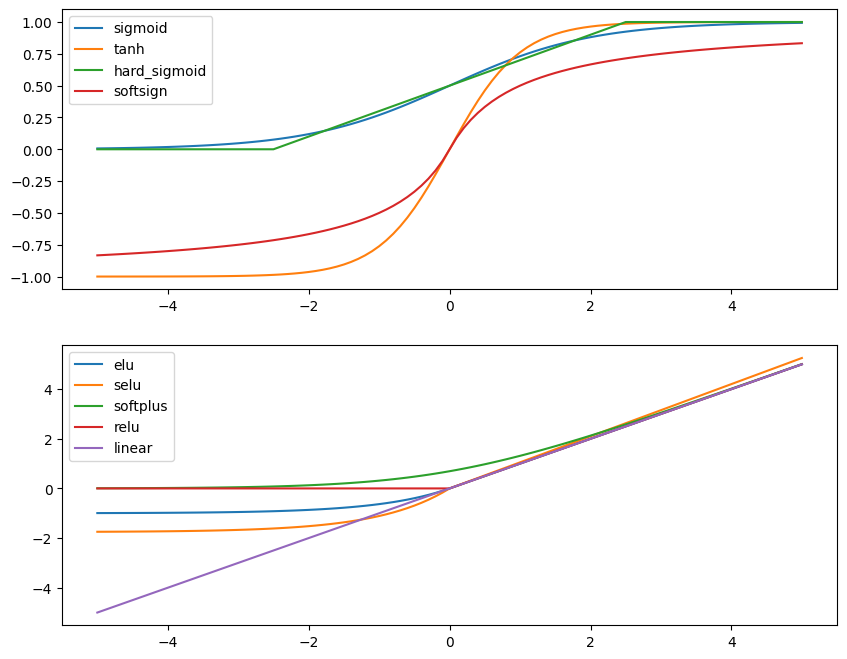

In [2]:
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation 
import matplotlib.pyplot as plt
import numpy as np
 
# 絶対値の範囲が 有限なもの
activations_type0 = [
    "sigmoid",
    "tanh",
    "hard_sigmoid",
    "softsign",
]

# 絶対値の範囲に上限がないもの
activations_type1 = [
    "elu",
    "selu",
    "softplus",
    "relu",
    "linear",
]

x = np.linspace(-5, 5, 101).reshape(-1, 1)

fig = plt.figure(figsize=(10, 8))
for i, activations in enumerate([activations_type0, activations_type1]) :
    ax = fig.add_subplot(2, 1, i + 1)
    for activation_str in activations:
        model = Sequential()
        model.add(Activation(activation_str, input_shape=(1,)))
        y = model.predict(x).ravel()
        ax.plot(x, y, label=activation_str)
    ax.legend()

plt.show()